# 6. ARMA models 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts  #for Stationary tests

In [4]:
data = pd.read_csv("data/data6_GDP_Q_real_SA.csv",
                   header=0, index_col=0)
data.index = pd.to_datetime(data.index)

data = data['1970':'2019']

data.columns = ['gdp']
data['gdpgr'] = data.gdp.pct_change()*100   #add a column of gdp growth using percent change function
data.head()

,gdp,gdpgr
DATE,,
1970-01-01,4939.759,NaN
1970-04-01,4946.770,0.141930
1970-07-01,4992.357,0.921551
1970-10-01,4938.857,-1.071638
1971-01-01,5072.996,2.715993


<Axes: xlabel='DATE'>

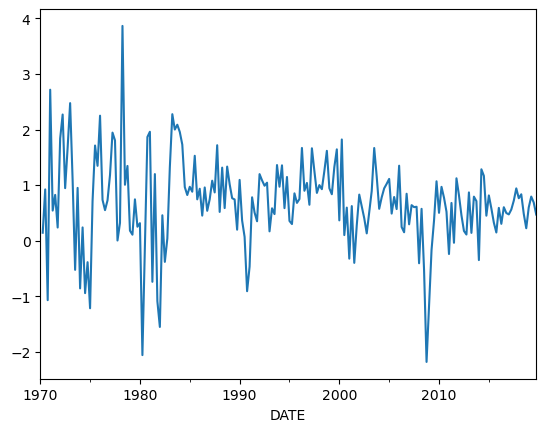

In [7]:
#data.gdp.plot()  #not stationary: has a trend
data.gdpgr.plot() #stationary

## AR(p) models

In [8]:
from statsmodels.tsa.arima.model import ARIMA   #ARIMA(): AR,MA, ARMA, ARIMA, ARIMAX ...

In [11]:
model_gdp_ar1 = ARIMA(data.gdp, order=(1,0,0))   #AR(1) model
results_gdp_ar1 = model_gdp_ar1.fit()  #fits the model. gives estimates
results_gdp_ar1.summary()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    gdp   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1216.900
Date:                Mon, 26 Feb 2024   AIC                           2439.800
Time:                        16:48:10   BIC                           2449.695
Sample:                    01-01-1970   HQIC                          2443.804
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.119e+04   1.41e+04      0.793      0.427   -1.65e+04    3.88e+04
ar.L1          0.9999      0.002    552.362      0.000       0.996       1.003
sigma2      1.082e+04   1249.706      8.661      0.000    8374.286    1.33e+04
===================================================================================
Ljung-Box (L1) (Q):                  28.42   Jarque-Bera (JB):               178.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model_gdp_ar2 = ARIMA(data.gdp, order=(2,0,0))   #AR(2) model
results_gdp_ar2 = model_gdp_ar2.fit()  #fits the model. gives estimates
results_gdp_ar2.summary()
#Since we are using the gdp instead of the gdpgr the coefficients will be not adequate? greater than 1 which means that the model is not stable.

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    gdp   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1157.724
Date:                Mon, 26 Feb 2024   AIC                           2323.448
Time:                        16:53:05   BIC                           2336.641
Sample:                    01-01-1970   HQIC                          2328.787
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.119e+04   9875.119      1.133      0.257   -8162.968    3.05e+04
ar.L1          1.6686      0.060     27.756      0.000       1.551       1.786
ar.L2         -0.6688      0.060    -11.138      0.000      -0.786      -0.551
sigma2      5950.5479    500.382     11.892      0.000    4969.816    6931.280
===================================================================================
Ljung-Box (L1) (Q):                  21.98   Jarque-Bera (JB):                22.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -0.35
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_gdp_ar3 = ARIMA(data.gdp, order=(3,0,0))   #AR(3) model
results_gdp_ar3 = model_gdp_ar3.fit()  #fits the model. gives estimates
results_gdp_ar3.summary()
#Since we are using the gdp instead of the gdpgr the coefficients will be not adequate? greater than 1 which means that the model is not stable.

In [14]:
sts.adfuller(data.gdp)  #gdp is not stationary: the test statistic is not statistically significant.

(1.7349466927576973,
 0.9982108779124726,
 12,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 2088.5874311542148)

In [15]:
sts.adfuller(data.gdpgr[1:])  #gdpgr is stationary [1:] because the first data is NAN

(-5.069113717319686,
 1.616863253025195e-05,
 11,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 383.6913210486165)

In [16]:
model_gdpgr_ar1 = ARIMA(data.gdpgr[1:], order=(1,0,0)) #AR(1) model for the gdp growth data
results_gdpgr_ar1 = model_gdpgr_ar1.fit()
results_gdpgr_ar1.summary()
# the gdp growth is kind of like a differencing of the gdp so that gdpgr solves the non-stationary problem

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  199
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -225.221
Date:                Mon, 26 Feb 2024   AIC                            456.443
Time:                        17:00:44   BIC                            466.322
Sample:                    04-01-1970   HQIC                           460.441
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6860      0.078      8.809      0.000       0.533       0.839
ar.L1          0.3049      0.058      5.237      0.000       0.191       0.419
sigma2         0.5628      0.036     15.543      0.000       0.492       0.634
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                68.39
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model_gdpgr_ar4 = ARIMA(data.gdpgr[1:], order=(4,0,0)) #AR(4) model for the gdp growth data
results_gdpgr_ar4 = model_gdpgr_ar4.fit()
results_gdpgr_ar4.summary()       
# The Log-likelihood is slightly better. so should conduct the LLR test to see if it's truely better

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  199
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -222.805
Date:                Mon, 26 Feb 2024   AIC                            457.610
Time:                        17:05:07   BIC                            477.370
Sample:                    04-01-1970   HQIC                           465.607
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6854      0.095      7.236      0.000       0.500       0.871
ar.L1          0.2574      0.063      4.063      0.000       0.133       0.382
ar.L2          0.1513      0.059      2.551      0.011       0.035       0.268
ar.L3         -0.0060      0.070     -0.086      0.932      -0.144       0.132
ar.L4          0.0181      0.057      0.316      0.752      -0.094       0.131
sigma2         0.5492      0.037     14.759      0.000       0.476       0.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                83.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test:

In [18]:
from scipy.stats.distributions import chi2  # chi-square function

In [19]:
def LLR_test(model1, model2, DF=1):
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR = -2*(L1-L2)
    p = chi2.sf(LR,DF).round(3)
    
    return p
# model 2 will be the more complex model , intepret the p-value whether if it is a better model(when rejected)

In [20]:
LLR_test(model_gdpgr_ar1, model_gdpgr_ar4, 3)  #AR(4) is not necessarily better than the AR(1)

0.184

In [21]:
model_gdpgr_ar2 = ARIMA(data.gdpgr[1:], order=(2,0,0)) #AR(2) model for the gdp growth data
results_gdpgr_ar2 = model_gdpgr_ar2.fit()
results_gdpgr_ar2.summary()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  199
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -222.835
Date:                Mon, 26 Feb 2024   AIC                            453.671
Time:                        17:12:40   BIC                            466.844
Sample:                    04-01-1970   HQIC                           459.002
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6853      0.093      7.377      0.000       0.503       0.867
ar.L1          0.2574      0.060      4.308      0.000       0.140       0.375
ar.L2          0.1535      0.060      2.579      0.010       0.037       0.270
sigma2         0.5493      0.035     15.900      0.000       0.482       0.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                86.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
LLR_test(model_gdpgr_ar1, model_gdpgr_ar2, 1)

0.029

In [23]:
#LAST step: Check if the residuals are autocorrelated
data['resid_gdpgr'] = model_gdpgr_ar4.fit().resid
sts.adfuller(data.resid_gdpgr[1:])  #stationary test, reject the null: stationary

(-4.9755175030722985,
 2.4807087394276825e-05,
 11,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 384.44237672260294)

<Axes: xlabel='DATE'>

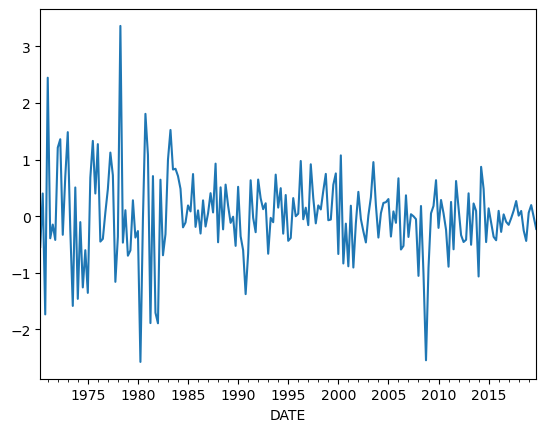

In [24]:
data.resid_gdpgr[1:].plot()

In [25]:
model_gdpgr_arma21 = ARIMA(data.gdpgr[1:], order=(2,0,1)) #ARMA(2,1) model for the gdp growth data
results_gdpgr_arma21 = model_gdpgr_arma21.fit()
results_gdpgr_arma21.summary()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  199
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -222.835
Date:                Mon, 26 Feb 2024   AIC                            455.671
Time:                        17:18:17   BIC                            472.137
Sample:                    04-01-1970   HQIC                           462.335
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6853      0.093      7.363      0.000       0.503       0.868
ar.L1          0.2540      0.414      0.613      0.540      -0.558       1.066
ar.L2          0.1545      0.128      1.208      0.227      -0.096       0.405
ma.L1          0.0035      0.427      0.008      0.993      -0.833       0.840
sigma2         0.5493      0.036     15.065      0.000       0.478       0.621
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                86.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""